In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
customer_file_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
customers_df = pd.read_csv(customer_file_url)

transactions_file_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"
transactions_df = pd.read_csv(transactions_file_url)

In [32]:
agg_transactions = transactions_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count')
).reset_index()

In [33]:
customer_data = pd.merge(customers_df, agg_transactions, on='CustomerID')

features = customer_data[['total_spent', 'transaction_count']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [94]:
# Function to visualize the clustering results using PCA
def visualize_clusters(data, cluster_labels, title="Cluster Visualization", noise=None):
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(data)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.7)
    if noise is not None:
        plt.scatter(noise[:, 0], noise[:, 1], color='red', marker='x', label='Noise')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title='Cluster')
    plt.show()

# K-Means Algorithm

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

kmeans_db_index = davies_bouldin_score(scaled_features, kmeans_labels)
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
kmeans_inertia = kmeans.inertia_

In [63]:
kmeans_db_index = davies_bouldin_score(scaled_features, kmeans_labels)
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
kmeans_inertia = kmeans.inertia_

print(f"K-Means DB Index: {kmeans_db_index}")
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"K-Means Inertia: {kmeans_inertia}")

K-Means DB Index: 0.7662431505517309
K-Means Silhouette Score: 0.42351438777086287
K-Means Inertia: 103.92701163026828


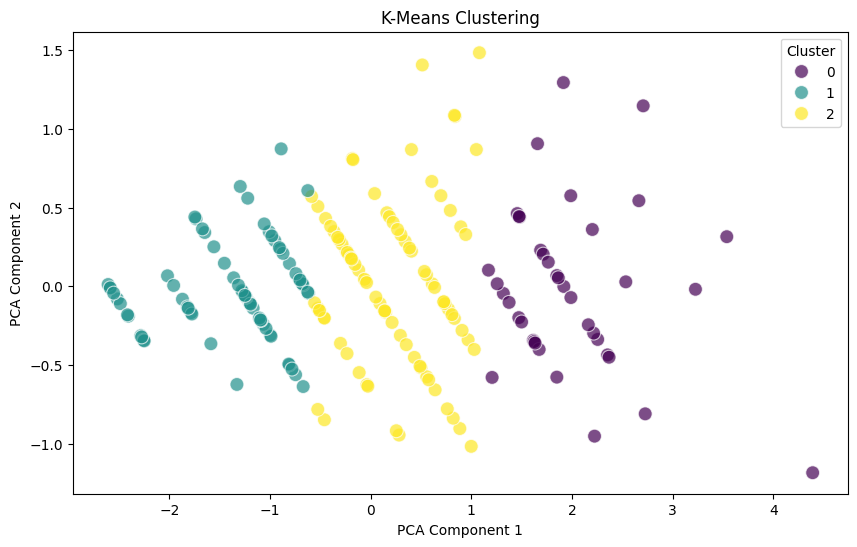

In [64]:
visualize_clusters(scaled_features, kmeans_labels, title="K-Means Clustering")

# DBSCAN

In [95]:
dbscan = DBSCAN(eps=0.3, min_samples=15)
dbscan_labels = dbscan.fit_predict(scaled_features)

In [96]:
# Removing "noise" clusters
dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]
dbscan_features_filtered = scaled_features[dbscan_labels != -1]
noise_points = scaled_features[dbscan_labels == -1]

dbscan_db_index = davies_bouldin_score(dbscan_features_filtered, dbscan_labels_filtered)
dbscan_silhouette = silhouette_score(dbscan_features_filtered, dbscan_labels_filtered)

print(f"DBSCAN DB Index: {dbscan_db_index}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

DBSCAN DB Index: 0.7465296662737262
DBSCAN Silhouette Score: 0.515971991214263


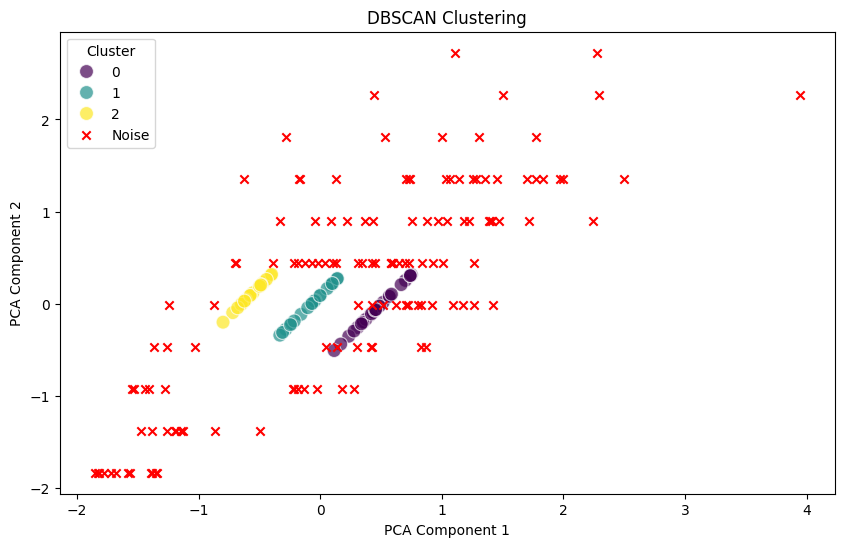

In [98]:
visualize_clusters(dbscan_features_filtered, dbscan_labels_filtered, title="DBSCAN Clustering", noise=noise_points)